[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

En este notebook, vamos a explorar cómo cargar un dataset utilizando la biblioteca de Python, Pandas. Pandas es una herramienta poderosa que nos permite manipular y analizar datos de manera eficiente.

Para ilustrar este proceso, utilizaremos un dataset de clustering de clientes. Este dataset contiene información sobre los clientes de un centro comercial. El centro comercial quiere segmentar a sus clientes en grupos, para poder crear campañas de marketing dirigidas a grupos específicos de clientes.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

> **Nota:** Cambiar la ruta del archivo de acuerdo a la ubicación en su computadora.

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [5]:
if IN_COLAB:
    # download a folder from github
    !wget -O datasets.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
    !unzip datasets.zip
    !mv CienciaDatos-MASDI-main/datasets datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main

--2024-11-04 22:02:06--  https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/DiegoPaezA/CienciaDatos-MASDI/zip/refs/heads/main [following]
--2024-11-04 22:02:06--  https://codeload.github.com/DiegoPaezA/CienciaDatos-MASDI/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [  <=>               ]   4.37M  12.4MB/s    in 0.4s    

2024-11-04 22:02:07 (12.4 MB/s) - ‘datasets.zip’ saved [4578563]

Archive:  datasets.zip
651ebcd29aee93ac9a665947d8b9c6313c98262c
   creating: CienciaDatos-MASDI-main/
  inflat

In [2]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [6]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv')
# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data = pd.read_csv("/content/Reporte_Sabana_de_Datos_SLA_SuperSalud_Agosto_2024v5.csv", on_bad_lines='skip', encoding='latin-1')

# Mostramos las 15 filas del dataset
data.head()

,Id del tiquete,Categoria,Tipo de tiquete,Usuario final,Area de usuario,Analista asignado,Grupo del analista,Cumplimiento ANS?,ANS,% ANS,Estado actual,Fecha de apertura,Fecha de solucion,Fecha de cierre,Prioridad
0,122700,Software Misional.NRVCC_Soporte_Funcional_Apoyo,Solicitud,entidad vigilado,Externa,Jefferson Yohan Cabrera Rodriguez,Grupo Mesa de servicio - 7x24,Si,SLA 4 hrs,0,Cerrado,1/08/2024,1/08/2024,5/08/2024,0
1,122701,Software Misional.NRVCC_Soporte_Funcional_Apoyo,Solicitud,entidad vigilado,Externa,Jefferson Yohan Cabrera Rodriguez,Grupo Mesa de servicio - 7x24,Si,SLA 4 hrs,0,Cerrado,1/08/2024,1/08/2024,5/08/2024,0
2,122702,Software Misional.NRVCC_Soporte_Funcional_Apoyo,Solicitud,entidad vigilado,Externa,Cristhian Andres Romero Beltran,Grupo Mesa de Servicio - Plataforma Aplicaciones,Si,SLA 4 hrs,0,Cerrado,1/08/2024,2/08/2024,7/08/2024,0
3,122703,Software Misional.NRVCC_Soporte_Funcional_Apoyo,Solicitud,entidad vigilado,Externa,Ana Maria Castro,Grupo Mesa de Servicio - Plataforma Aplicaciones,Si,SLA 4 hrs,0,Cerrado,1/08/2024,1/08/2024,6/08/2024,0
4,122704,Software Misional.NRVCC_Soporte_Funcional_Apoyo,Solicitud,entidad vigilado,Externa,Cristian Jesus Gonzalez Coley,Grupo Mesa de Servicio - Plataforma Aplicaciones,Si,SLA 4 hrs,0,Cerrado,1/08/2024,1/08/2024,6/08/2024,0


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id del tiquete      5336 non-null   int64 
 1   Categoria           5336 non-null   object
 2   Tipo de tiquete     5336 non-null   object
 3   Usuario final       5336 non-null   object
 4   Area de usuario     5336 non-null   object
 5   Analista asignado   5336 non-null   object
 6   Grupo del analista  5336 non-null   object
 7   Cumplimiento ANS?   5336 non-null   object
 8   ANS                 5336 non-null   object
 9   % ANS               5336 non-null   int64 
 10  Estado actual       5336 non-null   object
 11  Fecha de apertura   5336 non-null   object
 12  Fecha de solucion   5336 non-null   object
 13  Fecha de cierre     5336 non-null   object
 14  Prioridad           5336 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 625.4+ KB


### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [35]:
data.describe()

,Id del tiquete,% ANS,Prioridad
count,5336.000000,5336.000000,5336.000000
mean,125498.485570,3.841829,0.108883
std,1627.585104,19.222188,0.565112
min,122700.000000,0.000000,0.000000
25%,124088.750000,0.000000,0.000000
50%,125479.500000,0.000000,0.000000
75%,126900.250000,0.000000,0.000000
max,128342.000000,100.000000,5.000000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [42]:
data.isnull().sum()

,0
Id del tiquete,0
Categoria,0
Tipo de tiquete,0
Usuario final,0
Area de usuario,0
Analista asignado,0
Grupo del analista,0
Cumplimiento ANS?,0
ANS,0
% ANS,0


### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

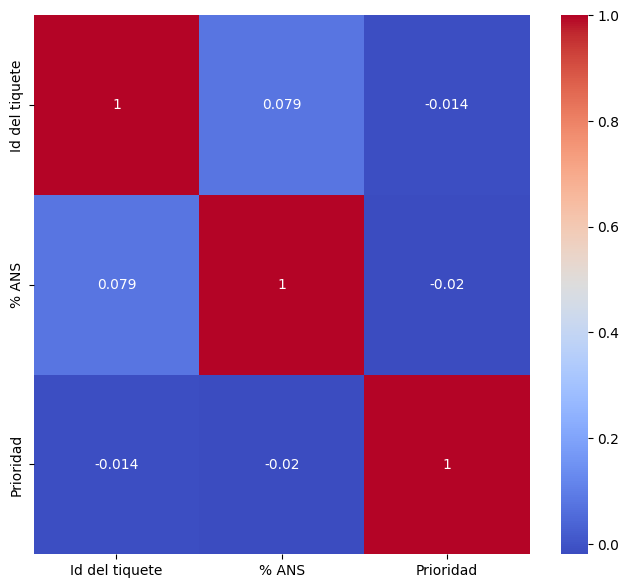

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

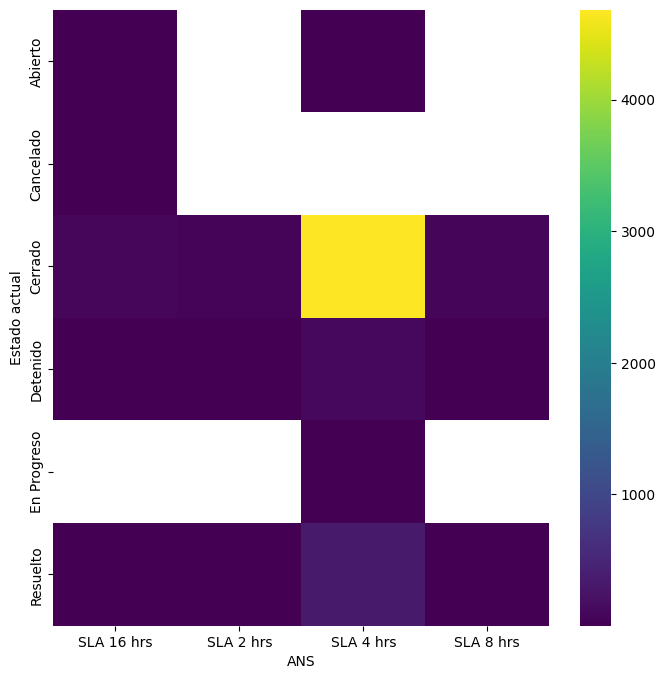

In [47]:
# @title ANS vs Estado actual

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Estado actual'].value_counts()
    for x_label, grp in data.groupby('ANS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ANS')
_ = plt.ylabel('Estado actual')

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

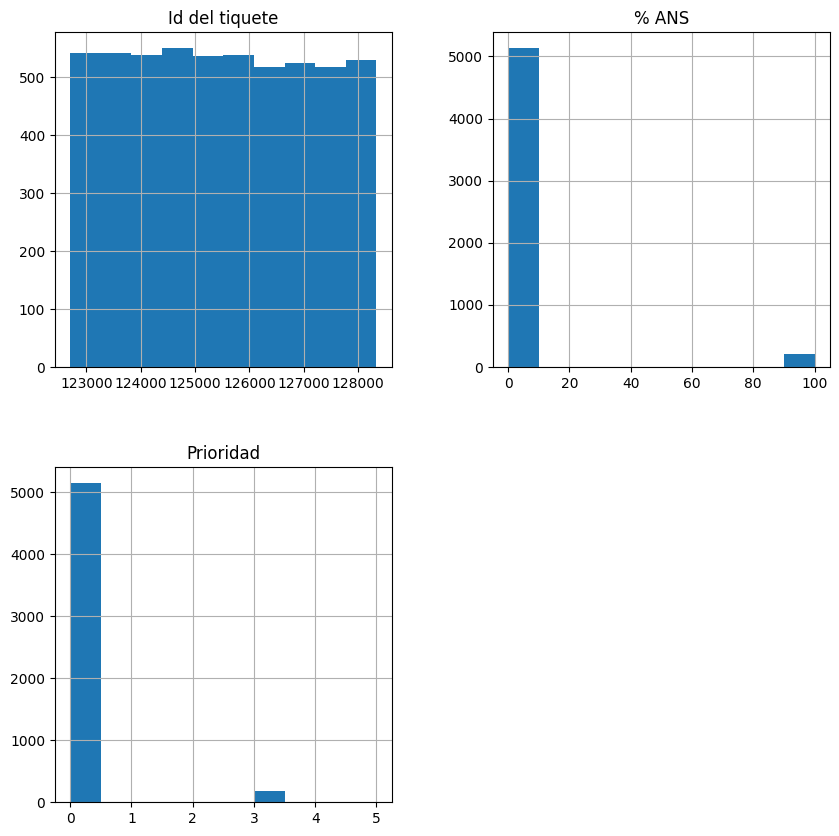

In [44]:
data.hist(figsize=(10, 10))
plt.show()

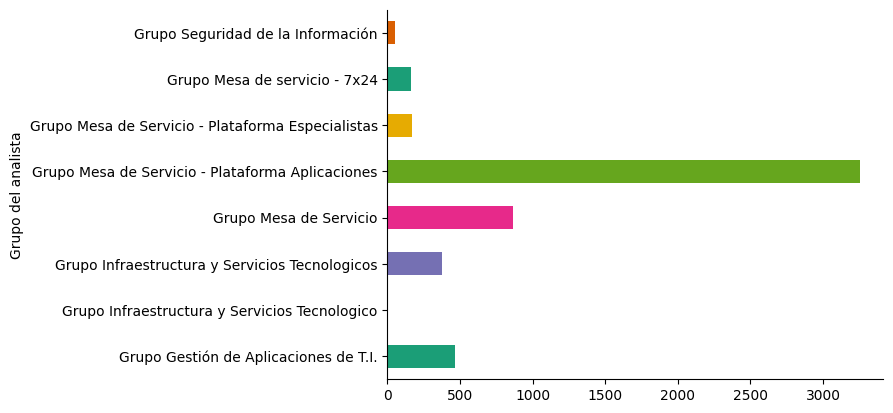

In [41]:
# @title Grupo del analista

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Grupo del analista').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### 6. Explorar la distribución de las variables categóricas

Es posible utilizar la función `value_counts()` para explorar la distribución de las variables categóricas.

Esto nos permite responder preguntas como:

* ¿Cuántas categorías hay en una columna?
* ¿Cuántas filas pertenecen a cada categoría en una columna?


In [45]:
data["Estado actual"].value_counts()

,count
Estado actual,
Cerrado,4875
Resuelto,344
Detenido,113
Abierto,2
Cancelado,1
En Progreso,1


<ipython-input-46-374c843b87a9>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Estado actual'], sort = True)


Text(0.5, 0, 'Estado actual')

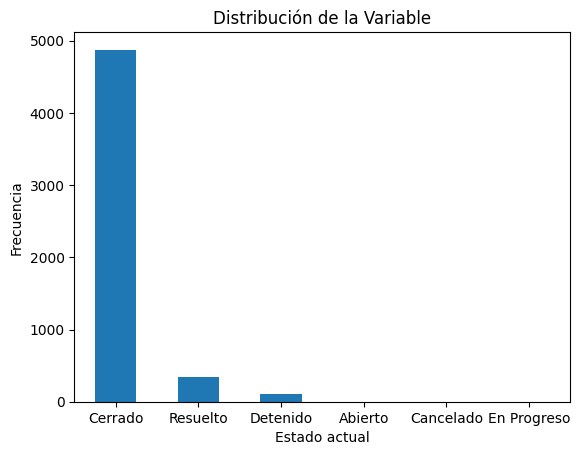

In [46]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['Estado actual'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("Estado actual")